<a href="https://colab.research.google.com/github/shqtbz143/202135992/blob/202135992-%EC%95%88%EC%84%9C%ED%98%84/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

도미의 길이와 무게를 파이썬 리스트로 만든다.
첫 번째 도미의 길이는 25.4cm, 무게는 242.0g인 것이다.

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

첫 번 도미의 길이는 25.4cm, 무게는 242.0g인 것이다.
길이를 x축 무게를 y축으로 두고, 그래프에 점으로 표현한다.
이런 그래프를 산점도(scatter plot)이라고 한다.
이 때, scatter()함수를 이용한다.
아래 그래프와 같이 일직선에 가까운 형태로 나타나는 경우를 선형liner이라고 한다.

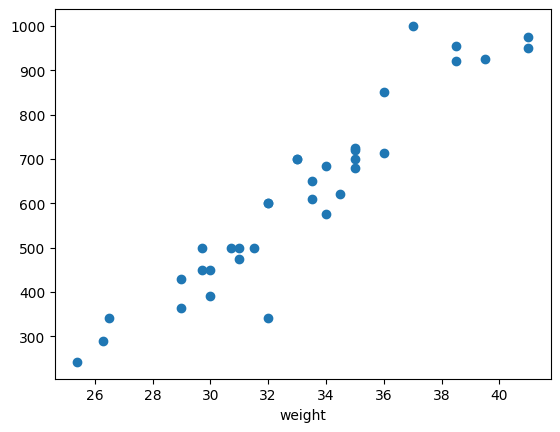

In [2]:
import matplotlib.pyplot as plt #matplotlib의 pylot 함수를 plt로 줄여서 사용
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

##방어데이터

멧플로립은 2개의 산점도 색을 구분하여 나타낸다.
방어는 길이가 늘어도 무게 변화는 크게 없다. -> 빙어도 선형적이나 무게가 길이에 영향을 덜 받는다.

In [3]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

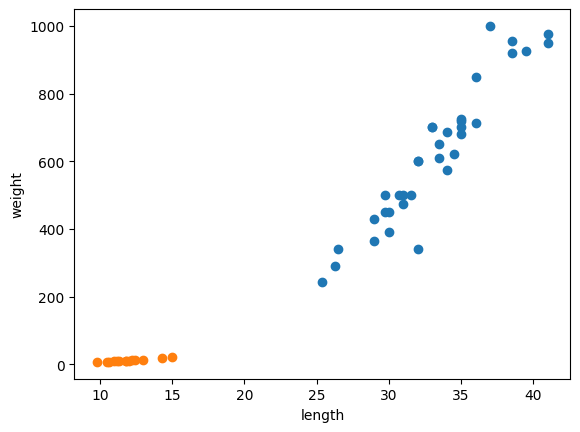

In [4]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

##첫 번째 머신러닝 프로그램

k-최근접 이웃 알고리즘을 통해 도미와 빙어 구분을 진행할 것이다. 도미와 빙어 데이터를 하나의 데이터로 합친다.

In [5]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

사이킷 런 패키지를 사용하려면 각 특성의 리스트를 세로 방향으로 늘어뜨린 2차원 리스트를 만들어야 한다. 그러기 위한 가장 쉬운 방법은 zip() 함수와 리스트 내포 list comprehension 구문을 사용하는 것이다.

zip() : 나열된 리스트 각각에서 원소를 꺼내 반환한다.


In [6]:
fish_data = [[l,w] for l, w in zip(length, weight)]

zip()함수로 length와 weight 리스트에서 원소를 하나씩 꺼내 l, w에 할당한다. 그럼 [l, w]가 하나의 원소인 리스트가 만들어진다.그 결과를 확인해본다.

In [7]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


이런 리스트를 2차원리스트, 리스트의 리스트라고 부른다.

마지막으로 정답 데이터가 필요하다. 각각 어떤 생선인지 답을 알려줘야 규칙을 찾을 수 있다.

도미를 1 빙어를 0이라고 한다면, 1은 35번 0은 14번 등장한다.

In [8]:
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


머신러닝에서 2개를 구분하는 경우 찾으려는 대상을 1로 놓고 그 외에는 0으로 놓는다. 도미를 찾는 대상으로 정의했기에 1로 놓고 빙어를 0으로 놓는다. 반대로 빙어를 찾는 대상으로 두고 빙어를 1로 놓아도 된다.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

모듈 전체를 임포트하지 않고 특정 클래스만 임포트하려면 from~import 구문을 사용한다.


임포트한 KNeighborsClassifier 클래스의 객체를 먼저 만든다.

In [13]:
kn = KNeighborsClassifier()

이 객체에 fish_data와 fish_target을 전달하여 도미를 찾기 위한 기준을 학습시킨다(훈련 training) 사이킷런에서 fit()메서드가 이런 역할을 한다. 이 메서드에fish_data와 fish_target 데이터를 순서대로 전달해보자

In [14]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

훈련시킨 후 객체의 kn이 얼마나 잘 훈련됐는지 확인해본다. score()메서드로 확인 가능하다.

0과 1사이의 값을 반환한다. 0.5라면 반만 맞췄다는 의미이다.

In [16]:
kn.score(fish_data, fish_target)

1.0

모든 fish_data의 답을 정확하게 맞혔다. 이 값을 정확도 accuracy라고 한다. 이 모델의 정확도는 100%이다.

##k-최근접 알고리즘


어떤 데이터에 대한 답을 구할 때 주위 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용한다.

In [17]:
kn.predict([[30, 600]])

array([1])

predict()메서드는 새로운 데이터의 정답을 예측한다. 리스트의 리스트를 전달해야한다. 즉, k-최근접 알고리즘을 위해 준비할 일은 데이터를 모두 가지고 있는 것이 전부이다.

다만, 데이터의 크기가 커 많은 메모리가 필요하고 직선거리를 계산하는 데 많은 시간이 필요하다.

KNeighborsClassifier클래스도 마찬가지이다. 이 클래스는 _fit_X속성에 fish_data 정보를, _y속성에 fish_target을 가지고 있다.

In [19]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [22]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [27]:
kn49 = KNeighborsClassifier(n_neighbors = 49) #참고 데이터 49개

k-최근접 이웃 알고리즘은 훈련이 없는 셈이다. fit()메서드에 전달한 데이터를 모두 저장하고 있다가 새로운 데이터가 등장하면 가장 가까운 데이터를 참고하여 빙어인지 구별한다.

비교할 가까운 데이터의 수는 정하기 나름이다. KNeighborsClassifier 클래스의 기본값은 5이나 바꿀 수 있다.

In [28]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

fish_data에는 도미 35개에 빙어 14개이다. kn49모델은 도미만 맞히기 때문에 정확도는 위와 같다.

In [29]:
print(35/49)

0.7142857142857143
